# Import the package and dataset

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [4]:
pd.read_csv('test.csv').head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [5]:
len(data)

80402

# Data Analysis

In [6]:
x=data.ix[:,0:5]
y=data['case_count']

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\karth\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


# We just have 2 segment. So we can seperate the data segments

In [7]:
set(data['segment'])

{1, 2}

In [8]:
x_1=data[data['segment']==1][['application_date','case_count']]
x_2=data[data['segment']==2][['application_date','case_count']]

# Graphical views

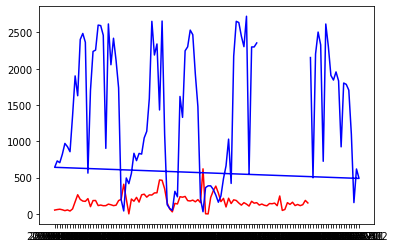

In [46]:
plt.plot(data[data['segment']==1]['application_date'][500:600],data[data['segment']==1]['case_count'][500:600],'r-')
plt.plot(data[data['segment']==2]['application_date'][500:600],data[data['segment']==2]['case_count'][500:600],'b-')
plt.show()

In [47]:
x_1

,application_date,case_count
0,2017-04-01,40.0
1,2017-04-03,5.0
2,2017-04-04,4.0
3,2017-04-05,113.0
4,2017-04-07,76.0
...,...,...
66893,2019-07-01,6.0
66894,2019-07-02,3.0
66895,2019-07-03,3.0
66896,2019-07-04,5.0


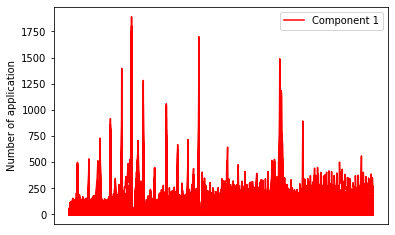

In [36]:
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y-%mmm'))
plt.gca().xaxis.set_major_locator(md.DayLocator(interval=30))
plt.plot(data[data['segment']==1]['application_date'],data[data['segment']==1]['case_count'], label='Component 1', color='r')
#plt.plot(data[data['segment']==2]['application_date'],data[data['segment']==2]['case_count'],'b-')
plt.legend()


plt.ylabel("Number of application")
plt.show()

# ARIMA model

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [15]:
input_series=x_1['case_count']
p=adfuller(input_series)[1]
p

1.917340314200779e-14

In [10]:
# if P value is less than 0.05 than data is stationary

In [36]:
def test_stationarity(timeseries):
    timeseries=pd.DataFrame(timeseries)
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

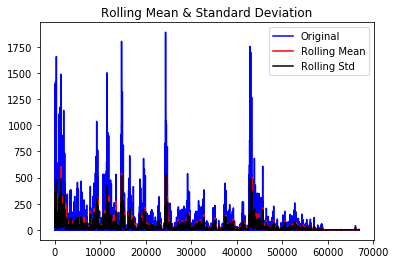

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [37]:
test_stationarity(input_series)

In [41]:
from pyramid.arima import auto_arima

ModuleNotFoundError: No module named 'pyramid.arima'

In [40]:
model_fit=ARIMA(input_series,order=(0,1,1))

In [12]:
model_fit=model_fit.fit(disp=0)

In [54]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.case_count   No. Observations:                66897
Model:                 ARIMA(0, 1, 1)   Log Likelihood             -347741.415
Method:                       css-mle   S.D. of innovations             43.781
Date:                Sun, 19 Jan 2020   AIC                         695488.831
Time:                        22:57:21   BIC                         695516.163
Sample:                             1   HQIC                        695497.278
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0012      0.016     -0.077      0.939      -0.032       0.030
ma.L1.D.case_count    -0.9072      0.002   -466.821      0.000      -0.911      -0.903
                    

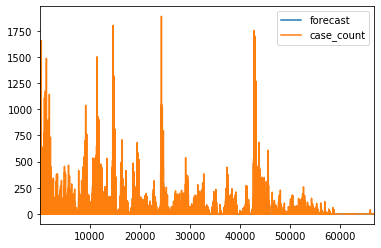

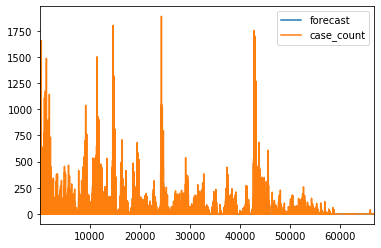

In [21]:
model_fit.plot_predict(1)

In [57]:
adfuller(input_series)[1]

1.917340314200779e-14

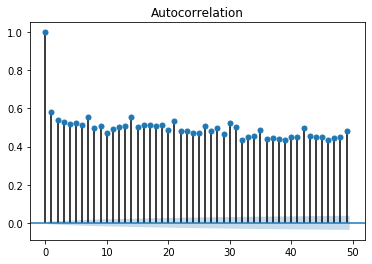

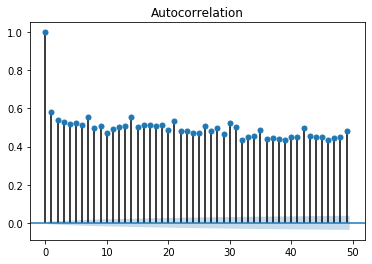

In [59]:
plot_acf(input_series)

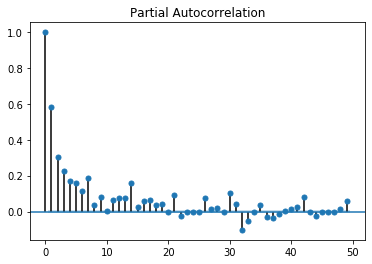

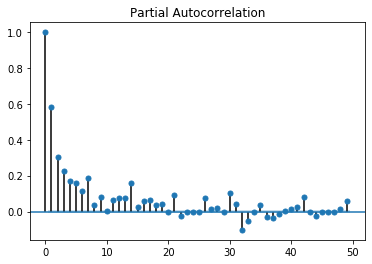

In [60]:
plot_pacf(input_series)